# Decision trees

In [106]:
import math
import warnings
from datetime import datetime
start=datetime.now()
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [107]:
data = pd.read_excel('C:/Personal/09142640/Downloads/Crimes_new_york_by_city_2013_u.xls', sheet_name=0, header=4)
data.columns.values[8]='Property_Crime'
data.head()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Property_Crime,Larceny-theft,Motor vehicle theft,Arson3
0,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [108]:
Y = data[['Property_Crime']]
X = data.drop(columns='Property_Crime')
X=X.fillna(0)
Y=Y.fillna(0)


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [110]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=4,
    max_depth=4
)


In [122]:
# Now predicting output from model on our test /Training data against our ground truth test data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(X, Y).score(X,Y)))

With 20% Holdout: 0.04285714285714286
Testing on Sample: 0.16954022988505746


In [123]:
#Evaluating the accuracy with the training data
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.04285714285714286

In [124]:
cross_val_score(rfc, X,Y,cv=10)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site

array([0.03787879, 0.03448276, 0.12121212, 0.22222222, 0.08      ,
       0.15      , 0.23529412, 0.07142857, 0.15384615, 0.22222222])

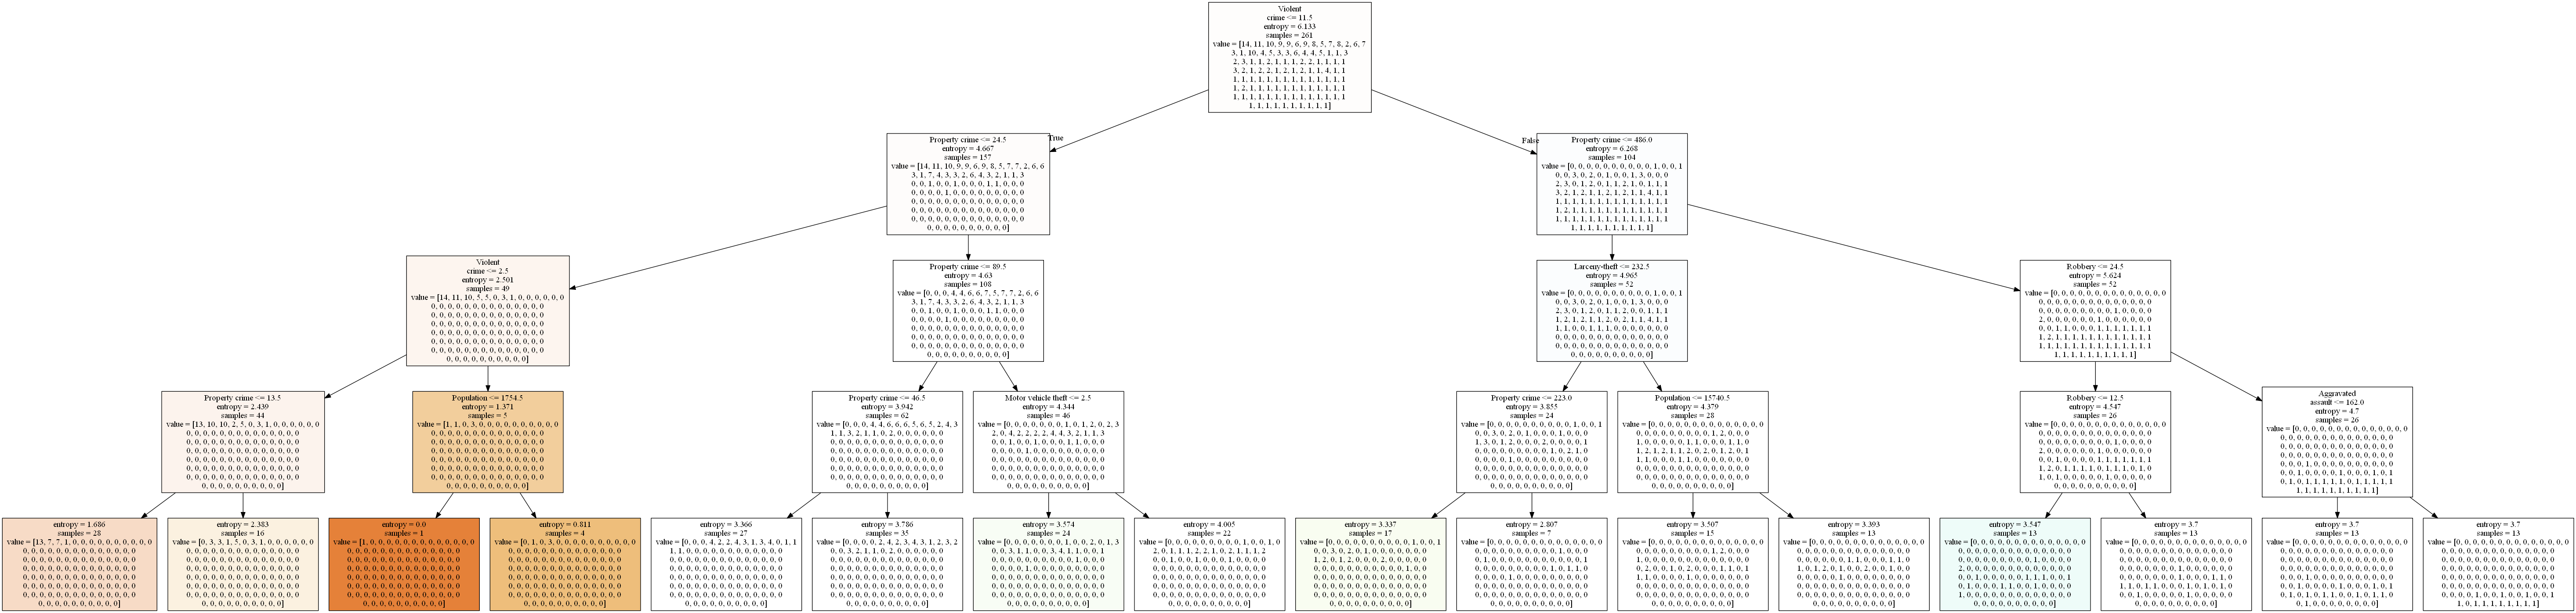

In [113]:


# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,filled=True
    
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [114]:
print(datetime.now()-start)

0:00:38.604631


# Random Forest

In [125]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
start=datetime.now()
rfc = ensemble.RandomForestClassifier()
Y = data[['Property_Crime']]
X = data.drop(columns='Property_Crime')
X=X.fillna(0)
Y=Y.fillna(0)



In [126]:
# Test your model with different holdout groups.
rfc = ensemble.RandomForestClassifier()
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfc.fit(X, Y).score(X,Y)))

With 20% Holdout: 0.11428571428571428
Testing on Sample: 0.9770114942528736


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [127]:
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X,Y,cv=10)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site

array([0.03787879, 0.05172414, 0.06060606, 0.11111111, 0.16      ,
       0.1       , 0.23529412, 0.14285714, 0.23076923, 0.22222222])

In [128]:
print(datetime.now()-start)

0:00:12.894876


Here , we oberserve that Random Forest is relatively faster than Decision Trees.Accuracy level for both are similar